# DS203 Project

# Sustainability and Utilisation of Energy Sources

## Exploratory Data Analysis & Data Visualization

### Data Cleaning and Preliminaries
<ol>
<li> Import the necessary libraries
<li> Read the data file into a data frame and display a portion of the data 
<li> Print the number of records and variables
<li> Print the datatype of each variable
<li> For each variable, print the number of unique values
<li> Identify redundant columns and drop them
<li> Identify nominal/categorical, ordinal, temporal (time stamps), integer (native but not nominal or ordinal), and continuous variables
<li> Identify countries with excessive null values and drop them
<li> Remove the rows with all NaN values
<li> Account for changes in world boundaries over 
<li> Scale data for energy to same units
<li> Rename columns for better readability
<li> Scale data to per capita values for meaningful comparisons
<li> Create new columns for total renewable and non-renewable energy production
</ol>

### Data Visualisation
#### In this section we will employ seaborn and geopandas to visualise data through plots
<ol> 
<li> Identify countries with maximum and minimum per capita energy consumption, renewable usage and non renewable usage (Barplot)
<li> Stacked bar plots (Year 2020) for selected countries (100%/Non-scaled)
<li> Plot time-series data of different countries -  x-axis : Year, y-axis : Total/Renewable/non-renewable energy per capita
<li> Top producers (one for each country) - stacked line plot to show evolution of relative distributions
<li> Display energy production by source/fraction renewable(2020)/fraction non-renewable(2020)/total(2020) for all countries on the world map
fraction of total / per-capita / total - 3 options
<li> For each variable, print mean, variance, skew, min, max, median, 25th percentile, 75th
percentile, and inter-quartile range.
<li> For each variable, plot box-and-whiskers plots.
<li> For each variable, plot the histogram three times: with too few bins, too many bins, good
number of bins.
<li> For each variable, use QQ-plot to see the extent to which the variable deviates from
normal distribution, and how (left-skew, right-skew, or more like uniform distribution)
<li> For each variable, check if the variable deviates is log-normal.
</ol>

Stacked bar with renewable and non renewable - for particular year
time series plot for particular country


### 1. Import the necessary libraries

In [454]:
import pandas as pd
import numpy as np
import geopandas as gpd
import shapefile as shp
from sklearn.linear_model import LinearRegression

### 2. Read the data file into a data frame and display a portion of the data 

In [455]:
pd.set_option("display.max_rows",10, "display.max_columns", 20) # Setting the number of maximum rows and columns to display in the PANDAS library
df = pd.read_excel("data/bp-stats-review-2021-consolidated-dataset-panel-format.xlsx") # Importing the excel sheet
df

,Country,Year,pop,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,...,ren_power_mtoe,ren_power_twh,renewables_ej,renewables_mtoe,solar_ej,solar_mtoe,solar_twh,wind_ej,wind_mtoe,wind_twh
0,Algeria,1965,12.550880,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Algeria,1966,12.902626,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Algeria,1967,13.275020,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Algeria,1968,13.663581,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Algeria,1969,14.061724,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6624,Zimbabwe,2016,14.030338,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6625,Zimbabwe,2017,14.236599,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6626,Zimbabwe,2018,14.438812,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6627,Zimbabwe,2019,14.645473,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Print the number of records and variables

In [456]:
records, variables = df.shape
print(f"records = {records}, variables = {variables}")

records = 6629, variables = 95


### 4. Print the datatype of each variable

In [457]:
df.dtypes

Country             object
Year                 int64
pop                float64
ISO3166_alpha3      object
ISO3166_numeric    float64
                    ...   
solar_mtoe         float64
solar_twh          float64
wind_ej            float64
wind_mtoe          float64
wind_twh           float64
Length: 95, dtype: object

### 5. For each variable, print the number of unique values

In [458]:
pd.set_option("display.max_rows", 69)
pd.DataFrame(df.nunique())

,0
Country,123
Year,56
pop,6583
ISO3166_alpha3,107
ISO3166_numeric,107
...,...
solar_mtoe,1602
solar_twh,1401
wind_ej,1811
wind_mtoe,1810


### 6. Identify redundant columns and drop them

In [459]:
(df.columns)

Index(['Country', 'Year', 'pop', 'ISO3166_alpha3', 'ISO3166_numeric', 'Region',
       'SubRegion', 'OPEC', 'EU', 'OECD', 'CIS', 'biodiesel_cons_kbd',
       'biodiesel_cons_kboed', 'biodiesel_cons_ktoe', 'biodiesel_cons_pj',
       'biodiesel_prod_kbd', 'biodiesel_prod_kboed', 'biodiesel_prod_ktoe',
       'biodiesel_prod_pj', 'biofuels_cons_ej', 'biofuels_cons_kbd',
       'biofuels_cons_kboed', 'biofuels_cons_ktoe', 'biofuels_cons_mtoe',
       'biofuels_cons_pj', 'biofuels_prod_kbd', 'biofuels_prod_kboed',
       'biofuels_prod_ktoe', 'biofuels_prod_pj', 'biogeo_ej', 'biogeo_mtoe',
       'biogeo_twh', 'co2_mtco2', 'coalcons_ej', 'coalcons_mtoe',
       'coalprod_ej', 'coalprod_mt', 'coalprod_mtoe', 'cobalt_kt', 'elect_twh',
       'electbyfuel_coal', 'electbyfuel_gas', 'electbyfuel_oil',
       'ethanol_cons_kbd', 'ethanol_cons_kboed', 'ethanol_cons_ktoe',
       'ethanol_cons_pj', 'ethanol_prod_kbd', 'ethanol_prod_kboed',
       'ethanol_prod_ktoe', 'ethanol_prod_pj', 'gascons_bc

One can observe that many columns represent the measurement of identical quantities in different units. Therefore, we will drop all columns that repeat this reading and only keep the measurements in one particular unit. 


In [460]:
['Country', # Country
'Year', # year of data measurement
'pop', # population
'Region',    # Geographical regions
'SubRegion', # Geographical subregions
'OPEC', 'EU', 'OECD', 'CIS'] # one-hot bit encoding for country member classes (i.e. OPEC member or non-member )
# all columns chosen

# biodiesel
['biodiesel_cons_kbd','biodiesel_cons_kboed', 'biodiesel_cons_ktoe', 'biodiesel_cons_pj',
'biodiesel_prod_kbd', 'biodiesel_prod_kboed', 'biodiesel_prod_ktoe',
'biodiesel_prod_pj']
# chosen column = 'biodiesel_prod_pj'

# biofuel
['biofuels_cons_ej', 'biofuels_cons_kbd',
'biofuels_cons_kboed', 'biofuels_cons_ktoe', 'biofuels_cons_mtoe',
'biofuels_cons_pj', 'biofuels_prod_kbd', 'biofuels_prod_kboed',
'biofuels_prod_ktoe', 'biofuels_prod_pj']
# chosen column = 'biofuels_prod_pj'

# geothermal, biomass and others
['biogeo_ej', 'biogeo_mtoe',
'biogeo_twh']
# chosen column = biogeo_ej

# co2
['co2_mtco2']

# coal
['coalcons_ej', 'coalcons_mtoe', 'coalprod_ej', 'coalprod_mt', 'coalprod_mtoe']
# chosen column = 'coalprod_ej'

# electricity
['elect_twh', 'electbyfuel_coal', 'electbyfuel_gas', 'electbyfuel_oil']
# chosen column = all

# ethanol
['ethanol_cons_kbd', 'ethanol_cons_kboed', 'ethanol_cons_ktoe','ethanol_cons_pj', 'ethanol_prod_kbd', 'ethanol_prod_kboed',
'ethanol_prod_ktoe', 'ethanol_prod_pj']
# chosen column = 'ethanol_prod_pj'

# gas
['gascons_bcfd', 'gascons_bcm', 'gascons_ej',
'gascons_mtoe', 'gasprod_bcfd', 'gasprod_bcm', 'gasprod_ej',
'gasprod_mtoe', 'gasreserves_tcm']
# chosen column = 'gasprod_ej'

# hydro
['hydro_ej','hydro_mtoe', 'hydro_twh']
# chosen column = 'hydro_ej'

# nuclear
['nuclear_ej', 'nuclear_mtoe', 'nuclear_twh']
# chosen column = 'nuclear_ej'

# oil
['oilcons_ej', 'oilcons_kbd', 'oilcons_mt', 'oilcons_mtoe', 'oilprod_crudecond_kbd', 'oilprod_kbd',
'oilprod_mt', 'oilprod_ngl_kbd', 'oilreserves_bbl']
#chosen column = 'oilcons_ej'

# primary energy
['primary_ej',
'primary_gj_pc', 'primary_mtoe']
# chosen column = 'primary_ej'

# renewables
['ren_power_ej', 'ren_power_mtoe', 'ren_power_twh',
'renewables_ej', 'renewables_mtoe']
#chosen column = 'ren_power_ej'

# solar
['solar_ej', 'solar_mtoe', 'solar_twh']
# chosen column = 'solar_ej'

# wind
['wind_ej', 'wind_mtoe', 'wind_twh']
# chosen column = 'wind_ej'

'''
The following columns will be dropped as they are not useful for our analysis
'''
['ISO3166_alpha3', 'ISO3166_numeric', # ISO 3166 codes - these have a 1-to-1 mapping with country
'cobalt_kt',   # cobalt production reserves
'graphite_kt', # graphite production reserves
'liqcons_kbd',   # Total Liquid fuel consumption
'lithium_kt',    # Lithium Production
'rareearths_kt', # rare earth material reserves
'refcap_kbd',    # oil refining capacity
'refthru_kbd']   # oil refinery throughput

chosen_columns = ['Country', 'Year', 'pop', 'Region', 'SubRegion', 'OPEC', 'EU', 'OECD', 'CIS',
 'biodiesel_prod_pj', 'biofuels_prod_pj','biogeo_ej', 'co2_mtco2', 'coalprod_ej',
 'elect_twh', 'electbyfuel_coal', 'electbyfuel_gas', 'electbyfuel_oil','ethanol_prod_pj',
 'gasprod_ej', 'hydro_ej','nuclear_ej','oilcons_ej','primary_ej','ren_power_ej','solar_ej','wind_ej']

Dropping the columns with more than 80% NaN values

In [461]:
filter1 = chosen_columns
percent_nulls = df.isnull().sum()*100/df.shape[0]
drop_columns = percent_nulls[percent_nulls > 80]
drop_columns = list(pd.DataFrame(drop_columns).index)
filter2 = drop_columns
filter = [i for i in filter1 if not i in filter2]
df[filter]

,Country,Year,pop,Region,SubRegion,OPEC,EU,OECD,CIS,biogeo_ej,...,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
0,Algeria,1965,12.550880,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.00400,0.0,0.055459,0.089139,0.0,0.0,0.0
1,Algeria,1966,12.902626,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.00355,0.0,0.072982,0.107168,0.0,0.0,0.0
2,Algeria,1967,13.275020,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.00410,0.0,0.068191,0.101426,0.0,0.0,0.0
3,Algeria,1968,13.663581,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.00563,0.0,0.072602,0.108879,0.0,0.0,0.0
4,Algeria,1969,14.061724,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.00361,0.0,0.076701,0.120508,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6624,Zimbabwe,2016,14.030338,Africa,Eastern Africa,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6625,Zimbabwe,2017,14.236599,Africa,Eastern Africa,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6626,Zimbabwe,2018,14.438812,Africa,Eastern Africa,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6627,Zimbabwe,2019,14.645473,Africa,Eastern Africa,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 7. Identify nominal/categorical, ordinal, temporal (time stamps), integer (native but not nominal or ordinal), and continuous variables

In [462]:
df[filter].columns

Index(['Country', 'Year', 'pop', 'Region', 'SubRegion', 'OPEC', 'EU', 'OECD',
       'CIS', 'biogeo_ej', 'co2_mtco2', 'coalprod_ej', 'elect_twh',
       'electbyfuel_coal', 'electbyfuel_gas', 'electbyfuel_oil', 'gasprod_ej',
       'hydro_ej', 'nuclear_ej', 'oilcons_ej', 'primary_ej', 'ren_power_ej',
       'solar_ej', 'wind_ej'],
      dtype='object')

In [463]:
df[filter].dtypes

Country              object
Year                  int64
pop                 float64
Region               object
SubRegion            object
OPEC                float64
EU                  float64
OECD                float64
CIS                 float64
biogeo_ej           float64
co2_mtco2           float64
coalprod_ej         float64
elect_twh           float64
electbyfuel_coal    float64
electbyfuel_gas     float64
electbyfuel_oil     float64
gasprod_ej          float64
hydro_ej            float64
nuclear_ej          float64
oilcons_ej          float64
primary_ej          float64
ren_power_ej        float64
solar_ej            float64
wind_ej             float64
dtype: object

| Column | Type |
| ------- | ------ |
|'Country'       | Categorical |
'pop'           | Continous  
'Region'        | Categorical|    
'Year'          |Temporal  |
'SubRegion'     | Categorical | 
'EU'            | One-hot-bit encoding|  
'OPEC'          | One-hot-bit encoding | 
'OECD'          | One-hot-bit encoding | 
'CIS'           | One-hot-bit encoding | 
'biogeo_ej'     | Continuous | 
'co2_mtco2'     | Continuous | 
'coalprod_ej'   | Continuous |
'elect_twh'     | Continuous | 
'electbyfuel_coal'|Continuous |  
'electbyfuel_gas' | Continuous| 
'electbyfuel_oil | Continuous |
'gasprod_ej' | Continuous |
'hydro_ej' | Continuous |
'nuclear_ej' | Continuous | 
'oilcons_ej' | Continuous | 
'primary_ej | Continuous  |
'ren_power_ej' | Continuous | 
'solar_ej'| Continuous  |
'wind_ej' | Continuous  |

### 8. Identify countries with excessive null values and drop them

For example, let as look at the distribution of null values in the dataset for India

In [464]:
grp = df[filter].groupby('Country')
df_temp = grp.get_group("India")
df_temp.isnull().sum()/df_temp.shape[0]*100

Country              0.000000
Year                 0.000000
pop                  0.000000
Region               0.000000
SubRegion            0.000000
OPEC                 0.000000
EU                   0.000000
OECD                 0.000000
CIS                  0.000000
biogeo_ej            0.000000
co2_mtco2            0.000000
coalprod_ej         28.571429
elect_twh           35.714286
electbyfuel_coal    35.714286
electbyfuel_gas     35.714286
electbyfuel_oil     35.714286
gasprod_ej           8.928571
hydro_ej             0.000000
nuclear_ej           0.000000
oilcons_ej           0.000000
primary_ej           0.000000
ren_power_ej         0.000000
solar_ej             0.000000
wind_ej              0.000000
dtype: float64

We can see about 35% missing data in some categories which is due to the absence of readings from older years in the dataset. This problem is more pronounced for some other countries and it will be necessary to drop the energy sources that have excessive NaN values.

Create a list of countries from the dataframe

In [465]:
countries = df['Country'].unique()

The following columns contain energy/ emission measurements, these are the quantities which may potentially contain null values.

In [466]:
print(filter[9:])

['biogeo_ej', 'co2_mtco2', 'coalprod_ej', 'elect_twh', 'electbyfuel_coal', 'electbyfuel_gas', 'electbyfuel_oil', 'gasprod_ej', 'hydro_ej', 'nuclear_ej', 'oilcons_ej', 'primary_ej', 'ren_power_ej', 'solar_ej', 'wind_ej']


Create a new dataframe with percentage of null values for each country. We can intepret this data as the percentage of years for which data is absent for a given country and energy source. We can reasonably assume that data will be absent for older years but be available for recent years.

In [467]:
grp = df[filter].groupby('Country')
df_dict = {'Country':[]}
for column in filter[9:]:
    df_dict[column] = []

for country in countries:
    df_dict['Country'].append(country)
    for column in filter[9:]:
        df_temp = grp.get_group(country)[column]
        percent_nulls = df_temp.isnull().sum()/df_temp.shape[0]*100
        df_dict[column].append(percent_nulls)

df_percent_nulls = pd.DataFrame(df_dict)
df_percent_nulls.set_index('Country', inplace = True)
df_percent_nulls

,biogeo_ej,co2_mtco2,coalprod_ej,elect_twh,electbyfuel_coal,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
Country,,,,,,,,,,,,,,,
Algeria,0.0,0.0,100.000000,35.714286,100.000000,100.000000,100.000000,8.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Argentina,0.0,0.0,100.000000,35.714286,35.714286,35.714286,35.714286,8.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Australia,0.0,0.0,28.571429,35.714286,35.714286,35.714286,35.714286,8.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Austria,0.0,0.0,100.000000,35.714286,100.000000,100.000000,100.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.0,0.0,28.571429,35.714286,100.000000,100.000000,100.000000,8.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vietnam,0.0,0.0,28.571429,35.714286,35.714286,35.714286,35.714286,8.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yemen,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,8.928571,100.0,100.0,100.0,100.0,100.0,100.0,100.0


We can sum over all columns and identify countries which have a large amount of missing data overall

In [468]:
pd.set_option("display.max_rows", None)
country_nulls = pd.DataFrame(df_percent_nulls.mean(axis = 1))


Using this dataframe we will obtain a list of countries with percentage of null values greater than a threshold (90%)

In [469]:
threshold = 90
countries_to_drop = list(country_nulls[country_nulls[0] > threshold].index)
print(countries_to_drop)

['Angola', 'Bahrain', 'Bolivia', 'Brunei', 'Chad', 'Cuba', 'Curacao', 'Democratic Republic of Congo', 'Equatorial Guinea', 'Gabon', 'Libya', 'Madagascar', 'Mongolia', 'Mozambique', 'Myanmar', 'Netherlands Antilles', 'New Caledonia', 'Nigeria', 'Papua New Guinea', 'Republic of Congo', 'Serbia', 'South Sudan', 'Sudan', 'Syria', 'Tunisia', 'Yemen', 'Zambia', 'Zimbabwe']


Now we display the dataframe for columns of interest and the countries with greater than 90% null values dropped

In [470]:
pd.set_option("display.max_rows", 20)
country_drop_filter = (df['Country'].isin(countries_to_drop))
df[filter][~country_drop_filter]

,Country,Year,pop,Region,SubRegion,OPEC,EU,OECD,CIS,biogeo_ej,...,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
0,Algeria,1965,12.550880,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.004000,0.0,0.055459,0.089139,0.000000,0.000000,0.000000
1,Algeria,1966,12.902626,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.003550,0.0,0.072982,0.107168,0.000000,0.000000,0.000000
2,Algeria,1967,13.275020,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.004100,0.0,0.068191,0.101426,0.000000,0.000000,0.000000
3,Algeria,1968,13.663581,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.005630,0.0,0.072602,0.108879,0.000000,0.000000,0.000000
4,Algeria,1969,14.061724,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.003610,0.0,0.076701,0.120508,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,Vietnam,2016,93.640435,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000616,...,44.781341,0.699708,0.368591,0.597945,0.0,0.930773,3.088531,0.002575,0.000060,0.001899
6503,Vietnam,2017,94.600643,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000688,...,39.482076,0.456004,0.342745,0.798859,0.0,0.974318,3.306803,0.003187,0.000084,0.002415
6504,Vietnam,2018,95.545959,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000684,...,40.082240,0.212300,0.347747,0.755921,0.0,1.037096,3.727491,0.004475,0.001015,0.002776
6505,Vietnam,2019,96.462108,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000004,...,42.488079,1.394456,0.354695,0.603704,0.0,1.103961,4.166350,0.036710,0.036702,0.000004


Now we can also view the df_percent_nulls dataframe after dropping the countries obtained above

In [471]:
percent_nulls_country_drop_filter = df_percent_nulls.index.isin(countries_to_drop)
df_percent_nulls[~percent_nulls_country_drop_filter]

,biogeo_ej,co2_mtco2,coalprod_ej,elect_twh,electbyfuel_coal,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
Country,,,,,,,,,,,,,,,
Algeria,0.000000,0.000000,100.000000,35.714286,100.000000,100.000000,100.000000,8.928571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Argentina,0.000000,0.000000,100.000000,35.714286,35.714286,35.714286,35.714286,8.928571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Australia,0.000000,0.000000,28.571429,35.714286,35.714286,35.714286,35.714286,8.928571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Austria,0.000000,0.000000,100.000000,35.714286,100.000000,100.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Azerbaijan,35.714286,35.714286,100.000000,35.714286,100.000000,100.000000,100.000000,35.714286,35.714286,35.714286,35.714286,35.714286,35.714286,35.714286,35.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,0.000000,0.000000,100.000000,35.714286,35.714286,35.714286,35.714286,8.928571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
United Kingdom,0.000000,0.000000,28.571429,35.714286,35.714286,35.714286,35.714286,8.928571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Uzbekistan,35.714286,35.714286,35.714286,35.714286,100.000000,100.000000,100.000000,35.714286,35.714286,35.714286,35.714286,35.714286,35.714286,35.714286,35.714286


Now we will identify columns which have more than 90% NaN values for a large number of countries. We obtain that none of the columns can be dropped since there is significant amount of data in each.

In [472]:
threshold = 90
for column in df_percent_nulls.columns:
    filt = df_percent_nulls[~percent_nulls_country_drop_filter][column] > threshold
    percent_countries_with_high_nulls = np.sum(filt)/df_percent_nulls.shape[0]*100
    print(column + ":", percent_countries_with_high_nulls)

biogeo_ej: 0.0
co2_mtco2: 0.0
coalprod_ej: 43.08943089430895
elect_twh: 0.8130081300813009
electbyfuel_coal: 43.90243902439025
electbyfuel_gas: 43.90243902439025
electbyfuel_oil: 43.90243902439025
gasprod_ej: 34.146341463414636
hydro_ej: 0.0
nuclear_ej: 0.0
oilcons_ej: 0.0
primary_ej: 0.0
ren_power_ej: 0.0
solar_ej: 0.0
wind_ej: 0.0


### 9. Remove rows with all NaN values

Whenever a country has missing data is missing in the past upto a certain date and then available uptil 2020. Country-year pairs serve as natural keys for our data. Thus, dropping rows with all NaNs is equivalent to removing rows with missing past data for each country.

In [473]:
df_filter = df[filter[9:]][~country_drop_filter]
mask = df_filter.isna().sum(axis=1) == df_filter.shape[1]
df_final =  df[filter][(~country_drop_filter) & (~mask)]
df_final

,Country,Year,pop,Region,SubRegion,OPEC,EU,OECD,CIS,biogeo_ej,...,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
0,Algeria,1965,12.550880,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.004000,0.0,0.055459,0.089139,0.000000,0.000000,0.000000
1,Algeria,1966,12.902626,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.003550,0.0,0.072982,0.107168,0.000000,0.000000,0.000000
2,Algeria,1967,13.275020,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.004100,0.0,0.068191,0.101426,0.000000,0.000000,0.000000
3,Algeria,1968,13.663581,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.005630,0.0,0.072602,0.108879,0.000000,0.000000,0.000000
4,Algeria,1969,14.061724,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.003610,0.0,0.076701,0.120508,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,Vietnam,2016,93.640435,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000616,...,44.781341,0.699708,0.368591,0.597945,0.0,0.930773,3.088531,0.002575,0.000060,0.001899
6503,Vietnam,2017,94.600643,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000688,...,39.482076,0.456004,0.342745,0.798859,0.0,0.974318,3.306803,0.003187,0.000084,0.002415
6504,Vietnam,2018,95.545959,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000684,...,40.082240,0.212300,0.347747,0.755921,0.0,1.037096,3.727491,0.004475,0.001015,0.002776
6505,Vietnam,2019,96.462108,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000004,...,42.488079,1.394456,0.354695,0.603704,0.0,1.103961,4.166350,0.036710,0.036702,0.000004


Now we have obtained our final dataframe where we have dropped all columns which have excessive missing data and also dropped the rows with all missing values. For remaining analysis we will use this filtered data.

### 10. Account for changes in world boundaries over time

USSR split to Russian Federation along with several smaller countries. For simplicity we can assume that the past production of USSR represent the values for Russian Federation as well

In [511]:
df_final[df_final['Country'] == 'USSR']

,Country,Year,pop,Region,SubRegion,OPEC,EU,OECD,CIS,biogeo_ej,...,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
6115,USSR,1965,230.218378,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.81434,0.018606,7.181458,24.847812,0.0,0.0,0.0
6116,USSR,1966,232.931747,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.91823,0.020639,7.690491,26.422695,0.0,0.0,0.0
6117,USSR,1967,235.428251,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.88571,0.022539,8.379157,27.773929,0.0,0.0,0.0
6118,USSR,1968,237.762971,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,1.04040,0.031334,8.932018,28.805019,0.0,0.0,0.0
6119,USSR,1969,240.016838,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,1.15181,0.036327,9.498164,30.072811,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6130,USSR,1980,264.383008,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,14.840596,1.83938,0.739233,18.006126,48.291290,0.0,0.0,0.0
6131,USSR,1981,266.707685,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,15.867025,1.86744,0.870887,18.163119,49.318502,0.0,0.0,0.0
6132,USSR,1982,269.060566,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,17.074187,1.74677,1.002541,18.030522,50.554661,0.0,0.0,0.0
6133,USSR,1983,271.450925,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,18.267709,1.80362,1.113954,17.767146,51.617290,0.0,0.0,0.0


In [475]:
df_final[df_final['Country'] == 'Russian Federation']

,Country,Year,pop,Region,SubRegion,OPEC,EU,OECD,CIS,biogeo_ej,...,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
4079,Russian Federation,1985,142.957289,CIS,CIS,0.0,0.0,0.0,1.0,0.000000,...,451.267182,113.337054,15.295724,1.597260,0.993172,10.570622,34.274092,0.000000,0.000000,0.000000
4080,Russian Federation,1986,143.995348,CIS,CIS,0.0,0.0,0.0,1.0,0.000000,...,469.813711,117.995068,16.652416,1.643310,1.052215,10.696893,34.879392,0.000000,0.000000,0.000000
4081,Russian Federation,1987,145.032886,CIS,CIS,0.0,0.0,0.0,1.0,0.000000,...,487.931242,122.545338,18.019702,1.625279,1.247022,10.784362,36.021774,0.000000,0.000000,0.000000
4082,Russian Federation,1988,146.013482,CIS,CIS,0.0,0.0,0.0,1.0,0.000000,...,494.153498,124.108076,19.526034,1.609236,1.348138,10.699243,36.652206,0.000000,0.000000,0.000000
4083,Russian Federation,1989,146.863927,CIS,CIS,0.0,0.0,0.0,1.0,0.000000,...,501.005068,125.828868,20.386795,1.597260,1.363385,10.898841,36.788617,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4110,Russian Federation,2016,145.275374,CIS,CIS,0.0,0.0,0.0,1.0,0.004037,...,521.809361,10.968449,21.213913,1.671337,1.780000,6.480802,28.823165,0.009617,0.004240,0.001341
4111,Russian Federation,2017,145.530091,CIS,CIS,0.0,0.0,0.0,1.0,0.004673,...,516.274203,6.946062,22.880191,1.666467,1.828269,6.457907,28.999904,0.010820,0.004896,0.001251
4112,Russian Federation,2018,145.734034,CIS,CIS,0.0,0.0,0.0,1.0,0.004512,...,523.722464,7.948117,24.088067,1.705704,1.830462,6.562507,30.105569,0.012221,0.005587,0.002122
4113,Russian Federation,2019,145.872260,CIS,CIS,0.0,0.0,0.0,1.0,0.004646,...,519.208661,12.011549,24.445614,1.732743,1.862978,6.716215,29.895868,0.016233,0.008781,0.002806


USSR data ends at 1984 while Russian Federation data starts at 1985. Before we merge the two countries we observe a sharp fall in population after the split of USSR. If the per capita values have not changed significantly we can merge the two countries for analysis. Therefore, let us look at per capita values

In [476]:
df_final[df_final['Country'] == 'USSR']

,Country,Year,pop,Region,SubRegion,OPEC,EU,OECD,CIS,biogeo_ej,...,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
6115,USSR,1965,230.218378,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.81434,0.018606,7.181458,24.847812,0.0,0.0,0.0
6116,USSR,1966,232.931747,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.91823,0.020639,7.690491,26.422695,0.0,0.0,0.0
6117,USSR,1967,235.428251,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.88571,0.022539,8.379157,27.773929,0.0,0.0,0.0
6118,USSR,1968,237.762971,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,1.04040,0.031334,8.932018,28.805019,0.0,0.0,0.0
6119,USSR,1969,240.016838,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,1.15181,0.036327,9.498164,30.072811,0.0,0.0,0.0
6120,USSR,1970,242.251443,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,6.750050,1.24377,0.043885,10.455989,31.634512,0.0,0.0,0.0
6121,USSR,1971,244.487290,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,7.242975,1.26099,0.053872,11.085012,33.189959,0.0,0.0,0.0
6122,USSR,1972,246.716701,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,7.549880,1.22899,0.098332,12.022780,34.899019,0.0,0.0,0.0
6123,USSR,1973,248.939799,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,8.057980,1.22345,0.143100,12.925434,36.674066,0.0,0.0,0.0
6124,USSR,1974,251.148561,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,8.886625,1.32030,0.214606,14.199014,38.698839,0.0,0.0,0.0


In [498]:
df_ussr = df_final[df_final['Country'] == 'USSR'].copy()
for column in filter[9:]:
       df_ussr[column] = (df_final[df_final['Country'] == 'USSR'][column]/df_final[df_final['Country'] == 'USSR']["pop"])

C:\Users\Pranava\AppData\Local\Temp/ipykernel_27284/768418547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ussr[column] = (df_final[df_final['Country'] == 'USSR'][column]/df_final[df_final['Country'] == 'USSR']["pop"])


In [508]:
pd.set_option("display.max_rows", 10)
df_ussr

,Country,Year,pop,Region,SubRegion,OPEC,EU,OECD,CIS,biogeo_ej,...,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
6115,USSR,1965,230.218378,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.003537,0.000081,0.031194,0.107931,0.0,0.0,0.0
6116,USSR,1966,232.931747,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.003942,0.000089,0.033016,0.113435,0.0,0.0,0.0
6117,USSR,1967,235.428251,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.003762,0.000096,0.035591,0.117972,0.0,0.0,0.0
6118,USSR,1968,237.762971,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.004376,0.000132,0.037567,0.121150,0.0,0.0,0.0
6119,USSR,1969,240.016838,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.004799,0.000151,0.039573,0.125295,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6130,USSR,1980,264.383008,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.056133,0.006957,0.002796,0.068106,0.182657,0.0,0.0,0.0
6131,USSR,1981,266.707685,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.059492,0.007002,0.003265,0.068101,0.184916,0.0,0.0,0.0
6132,USSR,1982,269.060566,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.063459,0.006492,0.003726,0.067013,0.187893,0.0,0.0,0.0
6133,USSR,1983,271.450925,CIS,CIS,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.067297,0.006644,0.004104,0.065453,0.190153,0.0,0.0,0.0


In [509]:
df_russia = df_final[df_final['Country'] == 'Russian Federation'].copy()
for column in filter[9:]:
       df_russia[column] = (df_final[df_final['Country'] == 'Russian Federation'][column]/df_final[df_final['Country'] == 'Russian Federation']["pop"])

C:\Users\Pranava\AppData\Local\Temp/ipykernel_27284/2347264513.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_russia[column] = (df_final[df_final['Country'] == 'Russian Federation'][column]/df_final[df_final['Country'] == 'Russian Federation']["pop"])


In [510]:
df_russia

,Country,Year,pop,Region,SubRegion,OPEC,EU,OECD,CIS,biogeo_ej,...,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
4079,Russian Federation,1985,142.957289,CIS,CIS,0.0,0.0,0.0,1.0,0.000000,...,3.156657,0.792804,0.106995,0.011173,0.006947,0.073943,0.239751,0.000000,0.000000,0.000000
4080,Russian Federation,1986,143.995348,CIS,CIS,0.0,0.0,0.0,1.0,0.000000,...,3.262701,0.819437,0.115646,0.011412,0.007307,0.074286,0.242226,0.000000,0.000000,0.000000
4081,Russian Federation,1987,145.032886,CIS,CIS,0.0,0.0,0.0,1.0,0.000000,...,3.364280,0.844949,0.124246,0.011206,0.008598,0.074358,0.248370,0.000000,0.000000,0.000000
4082,Russian Federation,1988,146.013482,CIS,CIS,0.0,0.0,0.0,1.0,0.000000,...,3.384300,0.849977,0.133728,0.011021,0.009233,0.073276,0.251019,0.000000,0.000000,0.000000
4083,Russian Federation,1989,146.863927,CIS,CIS,0.0,0.0,0.0,1.0,0.000000,...,3.411356,0.856772,0.138814,0.010876,0.009283,0.074210,0.250495,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4110,Russian Federation,2016,145.275374,CIS,CIS,0.0,0.0,0.0,1.0,0.000028,...,3.591864,0.075501,0.146026,0.011505,0.012253,0.044610,0.198404,0.000066,0.000029,0.000009
4111,Russian Federation,2017,145.530091,CIS,CIS,0.0,0.0,0.0,1.0,0.000032,...,3.547543,0.047729,0.157220,0.011451,0.012563,0.044375,0.199271,0.000074,0.000034,0.000009
4112,Russian Federation,2018,145.734034,CIS,CIS,0.0,0.0,0.0,1.0,0.000031,...,3.593687,0.054539,0.165288,0.011704,0.012560,0.045031,0.206579,0.000084,0.000038,0.000015
4113,Russian Federation,2019,145.872260,CIS,CIS,0.0,0.0,0.0,1.0,0.000032,...,3.559338,0.082343,0.167582,0.011878,0.012771,0.046042,0.204946,0.000111,0.000060,0.000019


In [506]:
df_ussr[df_ussr['Year']==1984][filter[9:]]

,biogeo_ej,co2_mtco2,coalprod_ej,elect_twh,electbyfuel_coal,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
6134,0.0,12.801449,0.052756,NaN,NaN,NaN,NaN,0.073134,0.007411,0.00525,0.064879,0.195522,0.0,0.0,0.0


In [507]:
df_russia[df_russia['Year']==1985][filter[9:]]

,biogeo_ej,co2_mtco2,coalprod_ej,elect_twh,electbyfuel_coal,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
4079,0.0,15.196137,0.054417,6.729283,0.96779,3.156657,0.792804,0.106995,0.011173,0.006947,0.073943,0.239751,0.0,0.0,0.0


We can see a significant jump in per capita values from USSR in 1984 to Russian Federation in 1985. Thus, we can not merge the two countries and must analyse them separately.

Looking at the list of countries we also notice 'China' and 'China Honk Kong SAR' listed separately. Let us compare their data and see how to handle it.

In [512]:
df_final['Country'].unique()

array(['Algeria', 'Argentina', 'Australia', 'Austria', 'Azerbaijan',
       'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'China', 'China Hong Kong SAR', 'Colombia', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'Egypt',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico', 'Morocco',
       'Netherlands', 'New Zealand', 'North Macedonia', 'Norway', 'Oman',
       'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar',
       'Romania', 'Russian Federation', 'Saudi Arabia', 'Singapore',
       'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain',
       'Sri Lanka', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand',
       'Total Africa', 'Total Asia Pacific', 'Total CIS',
       'Total Central America', '

In [518]:
df_final[df_final['Country']=='China'][filter[9:]]

,biogeo_ej,co2_mtco2,coalprod_ej,elect_twh,electbyfuel_coal,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
941,0.000000,488.525419,NaN,NaN,NaN,NaN,NaN,NaN,0.220970,0.000000,0.464625,5.516043,0.000000,0.000000,0.000000
942,0.000000,530.349045,NaN,NaN,NaN,NaN,NaN,NaN,0.224859,0.000000,0.596880,5.995001,0.000000,0.000000,0.000000
943,0.000000,475.920674,NaN,NaN,NaN,NaN,NaN,NaN,0.193835,0.000000,0.589294,5.391341,0.000000,0.000000,0.000000
944,0.000000,476.682790,NaN,NaN,NaN,NaN,NaN,NaN,0.228704,0.000000,0.644524,5.445350,0.000000,0.000000,0.000000
945,0.000000,582.473700,NaN,NaN,NaN,NaN,NaN,NaN,0.232593,0.000000,0.864160,6.627664,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,0.562522,9278.978313,70.816435,6133.160,4156.350123,188.280200,10.367000,4.965898,10.440824,1.929959,25.062933,128.631528,3.345388,0.602294,2.180571
993,0.716377,9466.360373,73.173994,6604.447,4430.029738,203.200000,9.868982,5.371181,10.485585,2.232900,26.202555,132.804467,4.517977,1.060200,2.741400
994,0.838581,9652.687227,76.870620,7166.133,4763.245667,215.500000,10.750364,5.811079,10.726884,2.639474,27.064349,137.576579,5.694318,1.582789,3.272947
995,1.004863,9810.456419,79.755979,7503.428,4849.697651,232.500000,10.750364,6.392154,11.343886,3.108444,27.935037,142.028730,6.614682,1.996821,3.612998


In [517]:
df_final[df_final['Country']=='China Hong Kong SAR'][filter[9:]]

,biogeo_ej,co2_mtco2,coalprod_ej,elect_twh,electbyfuel_coal,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
997,0.000000,7.134408,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.089537,0.094687,0.000000,0.000000,0.000000
998,0.000000,7.697027,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.098255,0.102693,0.000000,0.000000,0.000000
999,0.000000,9.074427,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.117735,0.121294,0.000000,0.000000,0.000000
1000,0.000000,9.781402,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.128587,0.131141,0.000000,0.000000,0.000000
1001,0.000000,11.469610,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.152573,0.154080,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,0.000588,92.704244,NaN,38.221444,NaN,NaN,NaN,NaN,0.0,0.0,0.812440,1.206175,0.000602,0.000009,0.000004
1049,0.000585,98.925738,NaN,36.984166,NaN,NaN,NaN,NaN,0.0,0.0,0.917589,1.293332,0.000602,0.000008,0.000009
1050,0.000601,99.501323,NaN,36.528429,NaN,NaN,NaN,NaN,0.0,0.0,0.929641,1.301775,0.000617,0.000010,0.000006
1051,0.000661,94.684744,NaN,36.870858,NaN,NaN,NaN,NaN,0.0,0.0,0.869359,1.240800,0.000676,0.000009,0.000006


We are uncertain is data for Hong Kong has been accounted for in the data for China

### 10. Scale data for energy to same units (to Exajoule)

Conversion facor : 1 TWh = 0.0036 Exajoules  
Columns for electricity (total and by fossil fuel sources) are measured in TWh (TerraWatt-hours). Only these columns need scaling. All other data is already measured in Exajoules.

In [543]:
df_final[filter[12:16]] = df_final[filter[12:16]]*.0036
df_final

,Country,Year,pop,Region,SubRegion,OPEC,EU,OECD,CIS,biogeo_ej,...,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
0,Algeria,1965,12.550880,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.004000,0.0,0.055459,0.089139,0.000000,0.000000,0.000000
1,Algeria,1966,12.902626,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.003550,0.0,0.072982,0.107168,0.000000,0.000000,0.000000
2,Algeria,1967,13.275020,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.004100,0.0,0.068191,0.101426,0.000000,0.000000,0.000000
3,Algeria,1968,13.663581,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.005630,0.0,0.072602,0.108879,0.000000,0.000000,0.000000
4,Algeria,1969,14.061724,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,0.003610,0.0,0.076701,0.120508,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,Vietnam,2016,93.640435,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000616,...,0.000580,0.000009,0.368591,0.597945,0.0,0.930773,3.088531,0.002575,0.000060,0.001899
6503,Vietnam,2017,94.600643,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000688,...,0.000512,0.000006,0.342745,0.798859,0.0,0.974318,3.306803,0.003187,0.000084,0.002415
6504,Vietnam,2018,95.545959,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000684,...,0.000519,0.000003,0.347747,0.755921,0.0,1.037096,3.727491,0.004475,0.001015,0.002776
6505,Vietnam,2019,96.462108,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000004,...,0.000551,0.000018,0.354695,0.603704,0.0,1.103961,4.166350,0.036710,0.036702,0.000004


Since we are only interested in total electricity generated by all fossil-fuel sources and non-fossil-fuel sources (i.e. we do not care about whether the electricity came from coal or natural gas for our analysis) we will add the electricity by fuel columns and drop the original ones. We will also add a new column for electricity generated by non-fossil fuels.

In [548]:
pd.set_option("display.max_columns", None)
df_final['elec_gen_fossil'] = (df_final["electbyfuel_coal"]) + (df_final["electbyfuel_gas"]) + (df_final["electbyfuel_oil"])
df_final['elec_gen_non_fossil'] = df_final['elect_twh'] - df_final['elec_gen_fossil']
df_final.drop(filter[13:16], axis = 1)

,Country,Year,pop,Region,SubRegion,OPEC,EU,OECD,CIS,biogeo_ej,co2_mtco2,coalprod_ej,elect_twh,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej,elec_gen_fossil,elec_gen_non_fossil
0,Algeria,1965,12.550880,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,5.568753,NaN,NaN,NaN,0.004000,0.0,0.055459,0.089139,0.000000,0.000000,0.000000,NaN,NaN
1,Algeria,1966,12.902626,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,6.867506,NaN,NaN,NaN,0.003550,0.0,0.072982,0.107168,0.000000,0.000000,0.000000,NaN,NaN
2,Algeria,1967,13.275020,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,6.369307,NaN,NaN,NaN,0.004100,0.0,0.068191,0.101426,0.000000,0.000000,0.000000,NaN,NaN
3,Algeria,1968,13.663581,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,6.771137,NaN,NaN,NaN,0.005630,0.0,0.072602,0.108879,0.000000,0.000000,0.000000,NaN,NaN
4,Algeria,1969,14.061724,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000,7.592118,NaN,NaN,NaN,0.003610,0.0,0.076701,0.120508,0.000000,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,Vietnam,2016,93.640435,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000616,198.082509,0.908175,0.002278,0.368591,0.597945,0.0,0.930773,3.088531,0.002575,0.000060,0.001899,0.001418,0.000860
6503,Vietnam,2017,94.600643,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000688,199.489386,0.900531,0.002483,0.342745,0.798859,0.0,0.974318,3.306803,0.003187,0.000084,0.002415,0.001328,0.001155
6504,Vietnam,2018,95.545959,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000684,240.981486,0.993729,0.002711,0.347747,0.755921,0.0,1.037096,3.727491,0.004475,0.001015,0.002776,0.001610,0.001101
6505,Vietnam,2019,96.462108,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,0.000004,292.073219,1.087582,0.002948,0.354695,0.603704,0.0,1.103961,4.166350,0.036710,0.036702,0.000004,0.002005,0.000943


### 11. Scale data to per capita values for meaningful comparisons


In [519]:

df_per_capita = df_final.copy()
for column in filter[9:]:
    df_per_capita[column] = (df_final[column]/df_final["pop"])

df_per_capita

,Country,Year,pop,Region,SubRegion,OPEC,EU,OECD,CIS,biogeo_ej,...,electbyfuel_gas,electbyfuel_oil,gasprod_ej,hydro_ej,nuclear_ej,oilcons_ej,primary_ej,ren_power_ej,solar_ej,wind_ej
0,Algeria,1965,12.550880,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000e+00,...,NaN,NaN,NaN,0.000319,0.0,0.004419,0.007102,0.000000,0.000000e+00,0.000000e+00
1,Algeria,1966,12.902626,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000e+00,...,NaN,NaN,NaN,0.000275,0.0,0.005656,0.008306,0.000000,0.000000e+00,0.000000e+00
2,Algeria,1967,13.275020,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000e+00,...,NaN,NaN,NaN,0.000309,0.0,0.005137,0.007640,0.000000,0.000000e+00,0.000000e+00
3,Algeria,1968,13.663581,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000e+00,...,NaN,NaN,NaN,0.000412,0.0,0.005314,0.007969,0.000000,0.000000e+00,0.000000e+00
4,Algeria,1969,14.061724,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.000000e+00,...,NaN,NaN,NaN,0.000257,0.0,0.005455,0.008570,0.000000,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,Vietnam,2016,93.640435,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,6.574311e-06,...,0.478227,0.007472,0.003936,0.006386,0.0,0.009940,0.032983,0.000028,6.447658e-07,2.028368e-05
6503,Vietnam,2017,94.600643,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,7.273587e-06,...,0.417355,0.004820,0.003623,0.008445,0.0,0.010299,0.034955,0.000034,8.915267e-07,2.552444e-05
6504,Vietnam,2018,95.545959,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,7.159508e-06,...,0.419507,0.002222,0.003640,0.007912,0.0,0.010854,0.039013,0.000047,1.062803e-05,2.905167e-05
6505,Vietnam,2019,96.462108,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,4.060044e-08,...,0.440464,0.014456,0.003677,0.006258,0.0,0.011445,0.043192,0.000381,3.804829e-04,4.469151e-08


### 11. Create new columns for total renewable and non-renewable energy production

## Data Visualisation

In [478]:
print(df_final['Country'].nunique())
print(df['Country'].nunique())

95
123


In [479]:
pd.set_option("display.max_rows", 10, "display.max_columns", 20)
df2 = df['Region'].value_counts()
df2

Europe                1888
Asia Pacific          1160
Africa                 902
S. & Cent. America     637
Middle East            616
CIS                    392
North America          168
Name: Region, dtype: int64

In [480]:
df2.value_counts()

1888    1
1160    1
902     1
637     1
616     1
392     1
168     1
Name: Region, dtype: int64

In [481]:
grp = df.groupby(['Country'])

In [482]:
df.dtypes

Country             object
Year                 int64
pop                float64
ISO3166_alpha3      object
ISO3166_numeric    float64
                    ...   
solar_mtoe         float64
solar_twh          float64
wind_ej            float64
wind_mtoe          float64
wind_twh           float64
Length: 95, dtype: object

In [483]:
df.columns.nunique

<bound method IndexOpsMixin.nunique of Index(['Country', 'Year', 'pop', 'ISO3166_alpha3', 'ISO3166_numeric', 'Region',
       'SubRegion', 'OPEC', 'EU', 'OECD', 'CIS', 'biodiesel_cons_kbd',
       'biodiesel_cons_kboed', 'biodiesel_cons_ktoe', 'biodiesel_cons_pj',
       'biodiesel_prod_kbd', 'biodiesel_prod_kboed', 'biodiesel_prod_ktoe',
       'biodiesel_prod_pj', 'biofuels_cons_ej', 'biofuels_cons_kbd',
       'biofuels_cons_kboed', 'biofuels_cons_ktoe', 'biofuels_cons_mtoe',
       'biofuels_cons_pj', 'biofuels_prod_kbd', 'biofuels_prod_kboed',
       'biofuels_prod_ktoe', 'biofuels_prod_pj', 'biogeo_ej', 'biogeo_mtoe',
       'biogeo_twh', 'co2_mtco2', 'coalcons_ej', 'coalcons_mtoe',
       'coalprod_ej', 'coalprod_mt', 'coalprod_mtoe', 'cobalt_kt', 'elect_twh',
       'electbyfuel_coal', 'electbyfuel_gas', 'electbyfuel_oil',
       'ethanol_cons_kbd', 'ethanol_cons_kboed', 'ethanol_cons_ktoe',
       'ethanol_cons_pj', 'ethanol_prod_kbd', 'ethanol_prod_kboed',
       'ethanol_pro

In [484]:
df_hdi = pd.read_csv('data/HDI_modified.csv', encoding='latin1')
l = (f"Unnamed: {x}" for x in range(3, 60) if not (x%2 == 0))
df_hdi.drop(list(l), axis = 1, inplace = True)
df_hdi

,HDI Rank,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,169,Afghanistan,0.302,0.307,0.316,0.312,0.307,0.331,0.335,0.339,...,0.472,0.477,0.489,0.496,0.5,0.5,0.502,0.506,0.509,0.511
1,69,Albania,0.65,0.631,0.615,0.618,0.624,0.637,0.646,0.645,...,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.790,0.792,0.795
2,91,Algeria,0.572,0.576,0.582,0.586,0.59,0.595,0.602,0.611,...,0.721,0.728,0.728,0.729,0.736,0.74,0.743,0.745,0.746,0.748
3,36,Andorra,..,..,..,..,..,..,..,..,...,0.837,0.836,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
4,148,Angola,..,..,..,..,..,..,..,..,...,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,113,Venezuela (Bolivarian Republic of),0.644,0.654,0.66,0.662,0.662,0.666,0.668,0.67,...,0.757,0.769,0.772,0.777,0.775,0.769,0.759,0.743,0.733,0.711
185,117,Viet Nam,0.483,0.493,0.504,0.514,0.525,0.537,0.548,0.547,...,0.661,0.671,0.676,0.681,0.683,0.688,0.693,0.696,0.700,0.704
186,179,Yemen,0.401,0.401,0.404,0.406,0.408,0.414,0.421,0.426,...,0.506,0.506,0.504,0.509,0.502,0.483,0.474,0.467,0.468,0.470
187,146,Zambia,0.421,0.417,0.416,0.419,0.414,0.415,0.416,0.416,...,0.527,0.534,0.549,0.557,0.561,0.569,0.571,0.578,0.582,0.584


In [485]:
df_gdp = pd.read_csv("data/GDP_modified.csv", encoding='latin1')
l = (f"Unnamed: {x}" for x in range(3, 30) if not (x%2 == 0))
df_gdp.drop(list(l), axis = 1, inplace = True)
df_gdp

,HDI Rank,Country,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,169,Afghanistan,..,..,..,1377,2094,2038,2220,2264,2249,2213,2201,2203,2190,2202
1,69,Albania,4928,4565,6016,8208,10973,11283,11462,11598,11828,12126,12548,13037,13601,13962
2,91,Algeria,8607,7809,8572,10338,10796,10902,11055,11139,11329,11511,11638,11551,11479,11350
3,148,Angola,5758,4122,4707,6183,7692,7675,8037,8141,8240,8036,7569,7311,6934,6654
4,78,Antigua and Barbuda,15460,15628,18395,19668,18206,17604,17966,17642,18104,18595,19418,19840,21116,21908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,19,Liechtenstein,..,..,..,..,..,..,..,..,..,..,..,..,..,..
188,185,South Sudan,..,..,..,..,..,..,..,..,..,..,..,..,..,..
189,151,Syrian Arab Republic,..,..,..,..,..,..,..,..,..,..,..,..,..,..
190,113,Venezuela (Bolivarian Republic of),..,..,..,..,..,..,..,..,..,..,..,..,..,..


(252, 2)
               COUNTRY                                           geometry
0  Aruba (Netherlands)  POLYGON ((-69.88223 12.41111, -69.94695 12.436...
1  Antigua and Barbuda  MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...
2          Afghanistan  POLYGON ((61.27656 35.60725, 61.29638 35.62853...
3              Algeria  POLYGON ((-5.15213 30.18047, -5.13917 30.19236...
4           Azerbaijan  MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...


<Figure size 7200x7200 with 0 Axes>

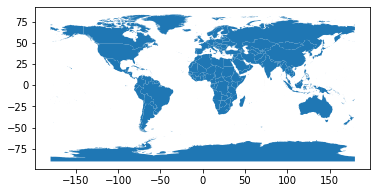

In [486]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (100, 100))
gdf = gpd.read_file("Shape file/World_Countries.shp")
print(gdf.shape)
print(gdf.head())
gdf.plot()
plt.show()

In [487]:
Entries = list(df["Country"].unique())
pd.DataFrame(Entries)

,0
0,Algeria
1,Angola
2,Argentina
3,Australia
4,Austria
...,...
118,Venezuela
119,Vietnam
120,Yemen
121,Zambia


In [488]:
print(Entries)

['Algeria', 'Angola', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Bolivia', 'Brazil', 'Brunei', 'Bulgaria', 'Canada', 'Chad', 'Chile', 'China', 'China Hong Kong SAR', 'Colombia', 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo', 'Denmark', 'Ecuador', 'Egypt', 'Equatorial Guinea', 'Estonia', 'Finland', 'France', 'Gabon', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malaysia', 'Mexico', 'Mongolia', 'Morocco', 'Mozambique', 'Myanmar', 'Netherlands', 'Netherlands Antilles', 'New Caledonia', 'New Zealand', 'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Papua New Guinea', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Republic of Congo', 'Romania', 'Russian Federation', 'Saudi Arabia', 'Serbia', 'Singapore', 'Slovakia',

In [489]:
nonCountryEntries = ['China Hong Kong SAR','Russian Federation','Total Africa', 'Total Asia Pacific', 'Total CIS', 'Total Central America', 'Total Eastern Africa', 'Total Europe',
                    'Total European Union', 'Total Middle Africa', 'Total Middle East', 'Total Non-OECD', 'Total North America', 'Total OECD', 'Total S. & Cent. America', 'Total Western Africa']

In [490]:
pd.set_option("display.max_rows", 100)
pd.merge(pd.DataFrame(df.groupby("Country").get_group("China").isnull().sum()), pd.DataFrame(df.groupby("Country").get_group("China Hong Kong SAR").isnull().sum()) )

,0
0,0
1,0
2,0
3,0
4,0
...,...
3229,56
3230,20
3231,20
3232,20


In [491]:
pd.DataFrame(df.groupby("Country").get_group("China Hong Kong SAR").isnull().sum())/pd.DataFrame(df.groupby("Country").get_group("China Hong Kong SAR")).shape[0]

,0
Country,0.000000
Year,0.000000
pop,0.000000
ISO3166_alpha3,0.000000
ISO3166_numeric,0.000000
Region,0.000000
SubRegion,0.000000
OPEC,0.000000
EU,0.000000
OECD,0.000000
